<a href="https://colab.research.google.com/github/bhavani-mahalakshmi/AI-prep/blob/main/bigmart_sales_knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train_cleaned.csv")
data.shape

(8523, 46)

In [3]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [4]:
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled, columns=x.columns)
x.shape

(8523, 45)

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=56)

In [9]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [11]:
reg = KNN(n_neighbors=5)
reg.fit(train_x, train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print("MSE ", k)

MSE  1714854.6015010108


In [16]:
def elbow(range_k):
  test_errors = []
  for i in range_k:
    clf = KNN(n_neighbors=i)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    k = mse(predict_y, test_y)
    test_errors.append(k)
  return test_errors

In [17]:
range_k = range(1, 40)
test = elbow(range_k)

Text(0.5, 1.0, 'KNN Regression')

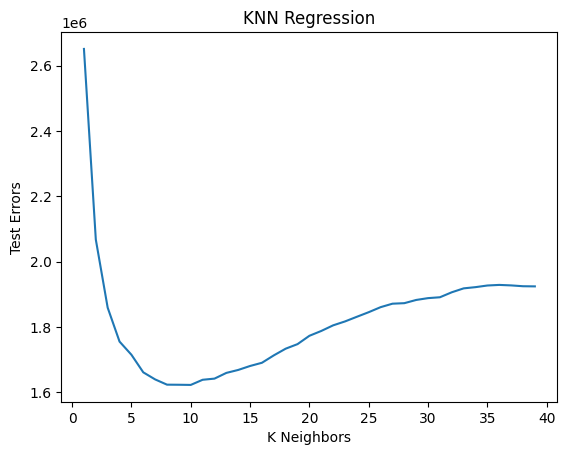

In [18]:
plt.plot(range_k, test)
plt.xlabel("K Neighbors")
plt.ylabel("Test Errors")
plt.title("KNN Regression")

In [21]:
reg = KNN(n_neighbors=9)
reg.fit(train_x, train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print("MSE ", k)

MSE  1622957.615752187
